<a href="https://colab.research.google.com/github/unalkizil/ukizil/blob/master/toz_yeni_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
dataframe = pd.read_excel("cleaned_data.xlsx")
dataframe.head()

,Temp,Hum,Dust
0,19,58,38
1,18,57,38
2,19,57,38
3,19,57,38
4,18,57,38


In [ ]:
X = dataframe[['Temp', 'Hum']]
y = dataframe['Dust']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train_scaled, y_train, epochs=100, batch_size=500, verbose=2)

Epoch 1/100
114/114 - 0s - loss: 0.4471 - 251ms/epoch - 2ms/step
Epoch 2/100
114/114 - 0s - loss: 0.4472 - 240ms/epoch - 2ms/step
Epoch 3/100
114/114 - 0s - loss: 0.4480 - 235ms/epoch - 2ms/step
Epoch 4/100
114/114 - 0s - loss: 0.4480 - 241ms/epoch - 2ms/step
Epoch 5/100
114/114 - 0s - loss: 0.4451 - 235ms/epoch - 2ms/step
Epoch 6/100
114/114 - 0s - loss: 0.4462 - 226ms/epoch - 2ms/step
Epoch 7/100
114/114 - 0s - loss: 0.4477 - 239ms/epoch - 2ms/step
Epoch 8/100
114/114 - 0s - loss: 0.4452 - 286ms/epoch - 3ms/step
Epoch 9/100
114/114 - 0s - loss: 0.4501 - 362ms/epoch - 3ms/step
Epoch 10/100
114/114 - 0s - loss: 0.4462 - 371ms/epoch - 3ms/step
Epoch 11/100
114/114 - 0s - loss: 0.4435 - 375ms/epoch - 3ms/step
Epoch 12/100
114/114 - 0s - loss: 0.4465 - 332ms/epoch - 3ms/step
Epoch 13/100
114/114 - 0s - loss: 0.4475 - 307ms/epoch - 3ms/step
Epoch 14/100
114/114 - 0s - loss: 0.4477 - 334ms/epoch - 3ms/step
Epoch 15/100
114/114 - 0s - loss: 0.4485 - 364ms/epoch - 3ms/step
Epoch 16/100
114/11

In [ ]:
mse = model.evaluate(X_test_scaled, y_test)
print(f'Mean Squared Error on Test Set: {mse}')


443/443 [==============================] - 1s 2ms/step - loss: 0.4355
Mean Squared Error on Test Set: 0.43550214171409607


443/443 [==============================] - 1s 1ms/step


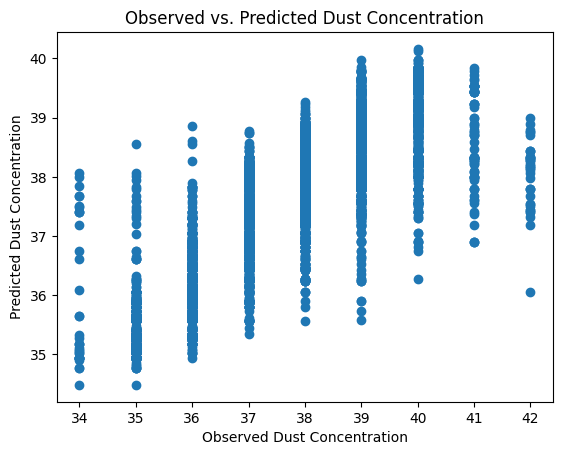

In [ ]:
y_pred = model.predict(X_test_scaled)

# Plotting predicted vs. observed values
plt.scatter(y_test, y_pred)
plt.xlabel('Observed Dust Concentration')
plt.ylabel('Predicted Dust Concentration')
plt.title('Observed vs. Predicted Dust Concentration')
plt.show()

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared on Test Set: {r2}')


R-squared on Test Set: 0.7204340719520661
